In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

alpha = 0.01
women = pd.read_csv('women football.csv')
men = pd.read_csv('men football.csv')
women.head()
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [55]:
men.info()
men['date'] = pd.to_datetime(men['date'])
men_subset = men[(men['date'] > '2002-01-01') | (men['tournament'].isin(['FIFA World Cup']))]

men_subset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14285 entries, 0 to 14284
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14285 non-null  int64 
 1   date        14285 non-null  object
 2   home_team   14285 non-null  object
 3   away_team   14285 non-null  object
 4   home_score  14285 non-null  int64 
 5   away_score  14285 non-null  int64 
 6   tournament  14285 non-null  object
dtypes: int64(3), object(4)
memory usage: 781.3+ KB


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1311,1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup
1312,1312,1930-07-13,France,Mexico,4,1,FIFA World Cup
1313,1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup
1314,1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup
1315,1315,1930-07-15,Argentina,France,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
12608,12608,1982-07-05,Spain,England,0,0,FIFA World Cup
12610,12610,1982-07-08,Germany,France,3,3,FIFA World Cup
12612,12612,1982-07-08,Poland,Italy,0,2,FIFA World Cup
12613,12613,1982-07-10,Poland,France,3,2,FIFA World Cup


In [56]:
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]
women_subset

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


In [ ]:
# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

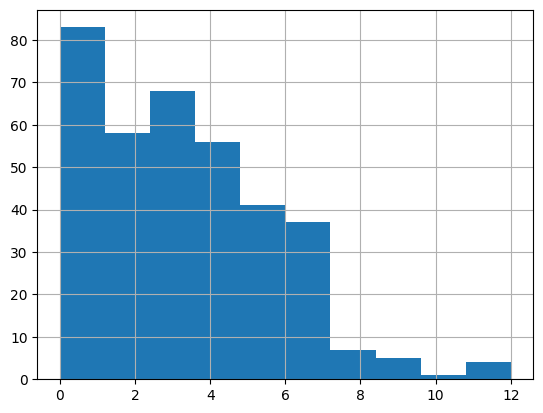

<Figure size 640x480 with 0 Axes>

In [58]:
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

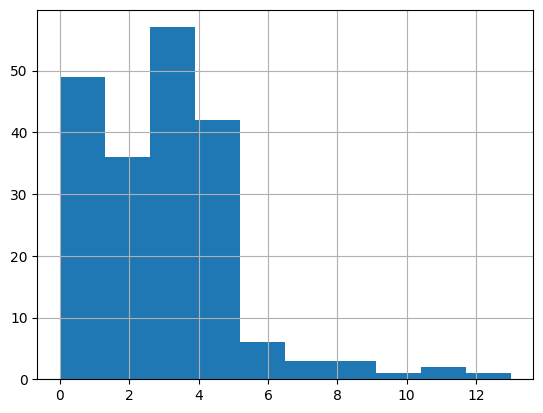

<Figure size 640x480 with 0 Axes>

In [59]:
women_subset["goals_scored"].hist()
plt.show()
plt.clf()

In [60]:
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")


In [61]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': 0.9702345890847272, 'result': 'fail to reject'}
